**Done By VISHVESHWARA**

---


**Register Number: 21BAI1208**

Dataset used: https://code.google.com/archive/p/hmm-speech-recognition/downloads

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Download the file using wget
!wget https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/hmm-speech-recognition/hmm-speech-recognition-0.1.zip -O dataset.zip

# Step 2: Unzip the dataset if it's compressed
!unzip dataset.zip -d dataset_folder

# Step 3: Explore the files to find the data format
import os
print(os.listdir('dataset_folder'))

Mounted at /content/drive
--2024-11-01 11:36:53--  https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/hmm-speech-recognition/hmm-speech-recognition-0.1.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 856703 (837K) [application/octet-stream]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 836.62K  --.-KB/s    in 0.02s   

2024-11-01 11:36:53 (53.9 MB/s) - ‘dataset.zip’ saved [856703/856703]

Archive:  dataset.zip
   creating: dataset_folder/hmm-speech-recognition-0.1/
   creating: dataset_folder/hmm-speech-recognition-0.1/audio/
   creating: dataset_folder/hmm-speech-recognition-0.1/audio/apple/
  inflating: dataset_folder/hmm-speech-recognition-0.1/audio/apple/apple01.wav  
   creating: dataset_folder/__MACOSX/
   c

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy

In [3]:
os.chdir("/content/dataset_folder/hmm-speech-recognition-0.1")

In [4]:
fpaths = []
labels = []
spoken = []

for f in os.listdir('audio'):
    for w in os.listdir('audio/' + f):
        fpaths.append('audio/' + f + '/' + w)
        labels.append(f)
        if f not in spoken:
            spoken.append(f)
print('Words spoken:', spoken)

Words spoken: ['lime', 'orange', 'banana', 'pineapple', 'kiwi', 'apple', 'peach']


In [5]:
from scipy.io import wavfile

data = np.zeros((len(fpaths), 32000))
maxsize = -1
for n,file in enumerate(fpaths):
    _, d = wavfile.read(file)
    print(d.shape)
    data[n, :d.shape[0]] = d
    if d.shape[0] > maxsize:
        maxsize = d.shape[0]
data = data[:, :maxsize]

#Each sample file is one row in data, and has one entry in labels
print('Number of files total:', data.shape[0])
all_labels = np.zeros(data.shape[0])
for n, l in enumerate(set(labels)):
    all_labels[np.array([i for i, _ in enumerate(labels) if _ == l])] = n

print('Labels and label indices', all_labels)

(3529,)
(3343,)
(3529,)
(3343,)
(3808,)
(3715,)
(3250,)
(3716,)
(3065,)
(3529,)
(3529,)
(3437,)
(3344,)
(3715,)
(3808,)
(6223,)
(5945,)
(6688,)
(6502,)
(6316,)
(5945,)
(5480,)
(6038,)
(6223,)
(6595,)
(6966,)
(5944,)
(6037,)
(6873,)
(6037,)
(3716,)
(4179,)
(4272,)
(3715,)
(4087,)
(4365,)
(3901,)
(4365,)
(3437,)
(4180,)
(4272,)
(3530,)
(4644,)
(4644,)
(4458,)
(4923,)
(4458,)
(4551,)
(4551,)
(4830,)
(5015,)
(4551,)
(4365,)
(4551,)
(4737,)
(4366,)
(4644,)
(4829,)
(4458,)
(4458,)
(3158,)
(2879,)
(3530,)
(3344,)
(3530,)
(2973,)
(3157,)
(3344,)
(3529,)
(3622,)
(3065,)
(3065,)
(3065,)
(3158,)
(3436,)
(2880,)
(3529,)
(3158,)
(2973,)
(3250,)
(3436,)
(3436,)
(3344,)
(3436,)
(3529,)
(2694,)
(3158,)
(3622,)
(3251,)
(3529,)
(5944,)
(5480,)
(5108,)
(5202,)
(5572,)
(5573,)
(5108,)
(4922,)
(4923,)
(5201,)
(5480,)
(5015,)
(5480,)
(5480,)
(5387,)
Number of files total: 105
Labels and label indices [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 5. 5. 5. 5. 5. 5

In [7]:
from scipy.signal.windows import hann
import numpy as np

def stft(x, fftsize=64, overlap_pct=.5):
    hop = int(fftsize * (1 - overlap_pct))
    w = hann(fftsize, sym=False)  # Using scipy.signal.windows.hann
    raw = np.array([np.fft.rfft(w * x[i:i + fftsize]) for i in range(0, len(x) - fftsize, hop)])
    return raw[:, :(fftsize // 2)]


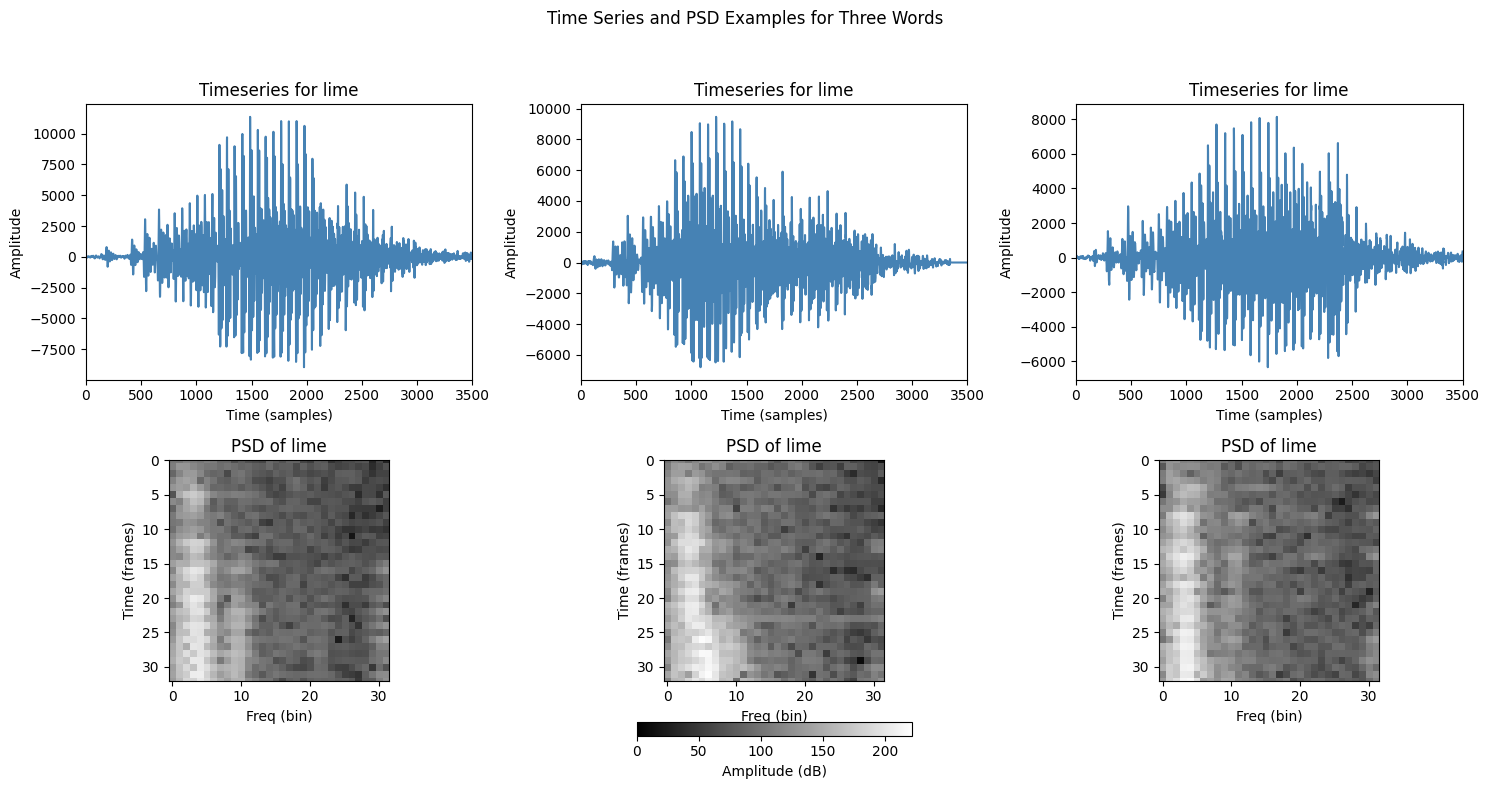

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Time Series and PSD Examples for Three Words')

for i in range(3):

    # Time series plot
    axes[0, i].plot(data[i, :], color='steelblue')
    axes[0, i].set_title('Timeseries for %s' % labels[i])
    axes[0, i].set_xlim(0, 3500)
    axes[0, i].set_xlabel('Time (samples)')
    axes[0, i].set_ylabel('Amplitude')

    # Compute log power spectral density (PSD)
    log_freq = 20 * np.log(np.abs(stft(data[i, :])) + 1)

    im = axes[1, i].imshow(log_freq, cmap='gray', interpolation=None)
    axes[1, i].set_xlabel('Freq (bin)')
    axes[1, i].set_ylabel('Time (frames)')
    axes[1, i].set_ylim(log_freq.shape[1], 0)
    axes[1, i].set_title('PSD of %s' % labels[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.colorbar(im, ax=axes[1, :], orientation='horizontal', fraction=0.05, pad=0.15, label='Amplitude (dB)')
plt.show()

Peak detection using Sliding Windows

In [10]:
from numpy.lib.stride_tricks import as_strided

def peakfind(x, n_peaks, l_size=3, r_size=3, c_size=3, f=np.mean):
    win_size = l_size + r_size + c_size
    shape = x.shape[:-1] + (x.shape[-1] - win_size + 1, win_size)
    strides = x.strides + (x.strides[-1],)
    xs = as_strided(x, shape=shape, strides=strides)
    def is_peak(x):
        centered = (np.argmax(x) == l_size + int(c_size/2))
        l = x[:l_size]
        c = x[l_size:l_size + c_size]
        r = x[-r_size:]
        passes = np.max(c) > np.max([f(l), f(r)])
        if centered and passes:
            return np.max(c)
        else:
            return -1
    r = np.apply_along_axis(is_peak, 1, xs)
    top = np.argsort(r, None)[::-1]
    heights = r[top[:n_peaks]]
    #Add l_size and half - 1 of center size to get to actual peak location
    top[top > -1] = top[top > -1] + l_size + int(c_size / 2.)
    return heights, top[:n_peaks]

Text(0, 0.5, 'Amplitude')

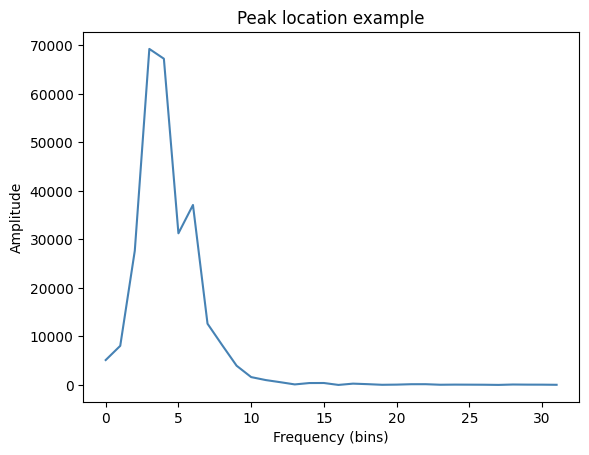

In [11]:
plot_data = np.abs(stft(data[20, :]))[15, :]
values, locs = peakfind(plot_data, n_peaks=8)
fp = locs[values > -1]
fv = values[values > -1]
plt.plot(plot_data, color='steelblue')
plt.plot(fp, fv, 'x', color='darkred')
plt.title('Peak location example')
plt.xlabel('Frequency (bins)')
plt.ylabel('Amplitude')

STFT (Short-Time Fourier Transform) and Peak Detection across freq. bins

In [12]:
all_obs = []
for i in range(data.shape[0]):
    d = np.abs(stft(data[i, :]))
    n_dim = 6
    obs = np.zeros((n_dim, d.shape[0]))
    for r in range(d.shape[0]):
        _, t = peakfind(d[r, :], n_peaks=n_dim)
        obs[:, r] = t.copy()
    if i % 10 == 0:
        print("Processed obs %s" % i)
    all_obs.append(obs)

all_obs = np.atleast_3d(all_obs)
all_obs

Processed obs 0
Processed obs 10
Processed obs 20
Processed obs 30
Processed obs 40
Processed obs 50
Processed obs 60
Processed obs 70
Processed obs 80
Processed obs 90
Processed obs 100


array([[[14., 14., 10., ..., 27., 27., 27.],
        [27., 19., 25., ..., 26., 26., 26.],
        [26., 27., 27., ...,  5.,  5.,  5.],
        [ 5.,  5., 14., ...,  6.,  6.,  6.],
        [ 6.,  6.,  5., ...,  7.,  7.,  7.],
        [ 7.,  7.,  6., ...,  8.,  8.,  8.]],

       [[ 5., 19., 22., ..., 27., 27., 27.],
        [14., 26., 27., ..., 26., 26., 26.],
        [26., 27., 14., ...,  5.,  5.,  5.],
        [27., 14.,  5., ...,  6.,  6.,  6.],
        [ 6.,  5.,  6., ...,  7.,  7.,  7.],
        [ 7.,  6.,  7., ...,  8.,  8.,  8.]],

       [[19., 15.,  7., ..., 27., 27., 27.],
        [27., 26., 27., ..., 26., 26., 26.],
        [14.,  5., 26., ...,  5.,  5.,  5.],
        [ 5.,  6.,  5., ...,  6.,  6.,  6.],
        [ 6.,  7.,  6., ...,  7.,  7.,  7.],
        [ 7.,  8.,  8., ...,  8.,  8.,  8.]],

       ...,

       [[ 5., 15., 17., ..., 27., 27., 27.],
        [15.,  4., 24., ..., 26., 26., 26.],
        [26., 27., 27., ...,  5.,  5.,  5.],
        [ 6., 24., 14., ...,  6.,  6

In [13]:
print(all_obs.shape)
print(data.shape)

(105, 6, 216)
(105, 6966)


HMM Model:

In [14]:
import scipy.stats as st
from scipy.stats import multivariate_normal

class gmmhmm:
    #This class converted with modifications from https://code.google.com/p/hmm-speech-recognition/source/browse/Word.m
    def __init__(self, n_states):
        self.n_states = n_states
        self.random_state = np.random.RandomState(0)

        #Normalize random initial state
        self.prior = self._normalize(self.random_state.rand(self.n_states, 1))
        self.A = self._stochasticize(self.random_state.rand(self.n_states, self.n_states))

        self.mu = None
        self.covs = None
        self.n_dims = None

    def _forward(self, B):
        log_likelihood = 0.
        T = B.shape[1]
        alpha = np.zeros(B.shape)
        for t in range(T):
            if t == 0:
                alpha[:, t] = B[:, t] * self.prior.ravel()
            else:
                alpha[:, t] = B[:, t] * np.dot(self.A.T, alpha[:, t - 1])

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood = log_likelihood + np.log(alpha_sum)
        return log_likelihood, alpha

    def _backward(self, B):
        T = B.shape[1]
        beta = np.zeros(B.shape);

        beta[:, -1] = np.ones(B.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = np.dot(self.A, (B[:, t + 1] * beta[:, t + 1]))
            beta[:, t] /= np.sum(beta[:, t])
        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.n_states, obs.shape[1]))
        for s in range(self.n_states):
            #Needs scipy 0.14
            np.random.seed(self.random_state.randint(1))
            B[s, :] = st.multivariate_normal.pdf(
                obs.T, mean=self.mu[:, s].T, cov=self.covs[:, :, s].T)
            #This function can (and will!) return values >> 1
            #See the discussion here for the equivalent matlab function
            #https://groups.google.com/forum/#!topic/comp.soft-sys.matlab/YksWK0T74Ak
            #Key line: "Probabilities have to be less than 1,
            #Densities can be anything, even infinite (at individual points)."
            #This is evaluating the density at individual points...
        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        #Using this _em_init function allows for less required constructor args
        if self.n_dims is None:
            self.n_dims = obs.shape[0]
        if self.mu is None:
            subset = self.random_state.choice(np.arange(self.n_dims), size=self.n_states, replace=False)
            self.mu = obs[:, subset]
        if self.covs is None:
            self.covs = np.zeros((self.n_dims, self.n_dims, self.n_states))
            self.covs += np.diag(np.diag(np.cov(obs)))[:, :, None]
        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        B = self._state_likelihood(obs)
        T = obs.shape[1]

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.n_states, self.n_states))
        gamma = np.zeros((self.n_states, T))

        for t in range(T - 1):
            partial_sum = self.A * np.dot(alpha[:, t], (beta[:, t] * B[:, t + 1]).T)
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:, t] * beta[:, t]
            gamma[:, t] = self._normalize(partial_g)

        partial_g = alpha[:, -1] * beta[:, -1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = gamma[:, 0]
        expected_A = self._stochasticize(xi_sum)

        expected_mu = np.zeros((self.n_dims, self.n_states))
        expected_covs = np.zeros((self.n_dims, self.n_dims, self.n_states))

        gamma_state_sum = np.sum(gamma, axis=1)
        #Set zeros to 1 before dividing
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        for s in range(self.n_states):
            gamma_obs = obs * gamma[s, :]
            expected_mu[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]
            partial_covs = np.dot(gamma_obs, obs.T) / gamma_state_sum[s] - np.dot(expected_mu[:, s], expected_mu[:, s].T)
            #Symmetrize
            partial_covs = np.triu(partial_covs) + np.triu(partial_covs).T - np.diag(partial_covs)

        #Ensure positive semidefinite by adding diagonal loading
        expected_covs += .01 * np.eye(self.n_dims)[:, :, None]

        self.prior = expected_prior
        self.mu = expected_mu
        self.covs = expected_covs
        self.A = expected_A
        return log_likelihood

    def fit(self, obs, n_iter=8):
        #Support for 2D and 3D arrays
        #2D should be n_features, n_dims
        #3D should be n_examples, n_features, n_dims
        #For example, with 6 features per speech segment, 105 different words
        #this array should be size
        #(105, 6, X) where X is the number of frames with features extracted
        #For a single example file, the array should be size (6, X)
        if len(obs.shape) == 2:
            for i in range(n_iter):
                self._em_init(obs)
                log_likelihood = self._em_step(obs)
        elif len(obs.shape) == 3:
            count = obs.shape[0]
            for n in range(count):
                for i in range(n_iter):
                    self._em_init(obs[n, :, :])
                    log_likelihood = self._em_step(obs[n, :, :])
        return self

    def transform(self, obs):
        #Support for 2D and 3D arrays
        #2D should be n_features, n_dims
        #3D should be n_examples, n_features, n_dims
        #For example, with 6 features per speech segment, 105 different words
        #this array should be size
        #(105, 6, X) where X is the number of frames with features extracted
        #For a single example file, the array should be size (6, X)
        if len(obs.shape) == 2:
            B = self._state_likelihood(obs)
            log_likelihood, _ = self._forward(B)
            return log_likelihood
        elif len(obs.shape) == 3:
            count = obs.shape[0]
            out = np.zeros((count,))
            for n in range(count):
                B = self._state_likelihood(obs[n, :, :])
                log_likelihood, _ = self._forward(B)
                out[n] = log_likelihood
            return out

In [15]:
rstate = np.random.RandomState(0)
t1 = np.ones((4, 40)) + .001 * rstate.rand(4, 40)
t1 /= t1.sum(axis=0)
t2 = rstate.rand(*t1.shape)
t2 /= t2.sum(axis=0)

m1 = gmmhmm(2)
m1.fit(t1)
m2 = gmmhmm(2)
m2.fit(t2)

m1t1 = m1.transform(t1)
m2t1 = m2.transform(t1)
print("Likelihoods for test set 1")
print("M1:", m1t1)
print("M2:", m2t1)
print("Prediction for test set 1")
print("Model", np.argmax([m1t1, m2t1]) + 1)
print()

m1t2 = m1.transform(t2)
m2t2 = m2.transform(t2)
print("Likelihoods for test set 2")
print("M1:", m1t2)
print("M2:", m2t2)
print("Prediction for test set 2")
print("Model", np.argmax([m1t2, m2t2]) + 1)

Likelihoods for test set 1
M1: 221.3941427176605
M2: 165.68854588913212
Prediction for test set 1
Model 1

Likelihoods for test set 2
M1: 33.20045732115577
M2: 60.30510397138956
Prediction for test set 2
Model 2


Training and Testing on Dataset:

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

# Normalize all observations
for n, i in enumerate(all_obs):
    all_obs[n] /= all_obs[n].sum(axis=0)

# Use the split method to create train/test indices
for train_index, test_index in sss.split(all_obs, all_labels):
    X_train, X_test = all_obs[train_index, ...], all_obs[test_index, ...]
    y_train, y_test = all_labels[train_index], all_labels[test_index]

print('Size of training matrix:', X_train.shape)
print('Size of testing matrix:', X_test.shape)

Size of training matrix: (94, 6, 216)
Size of testing matrix: (11, 6, 216)


In [17]:
ys = set(all_labels)
ms = [gmmhmm(6) for y in ys]

In [ ]:
_ = [m.fit(X_train[y_train == y, :, :]) for m, y in zip(ms, ys)]

In [ ]:
ps = [m.transform(X_test) for m in ms]
res = np.vstack(ps)
predicted_labels = np.argmax(res, axis=0)
dictionary = ['eye', 'apple', 'book', 'human', 'god', 'fast', 'dog', 'cat']
missed = (predicted_labels != y_test)

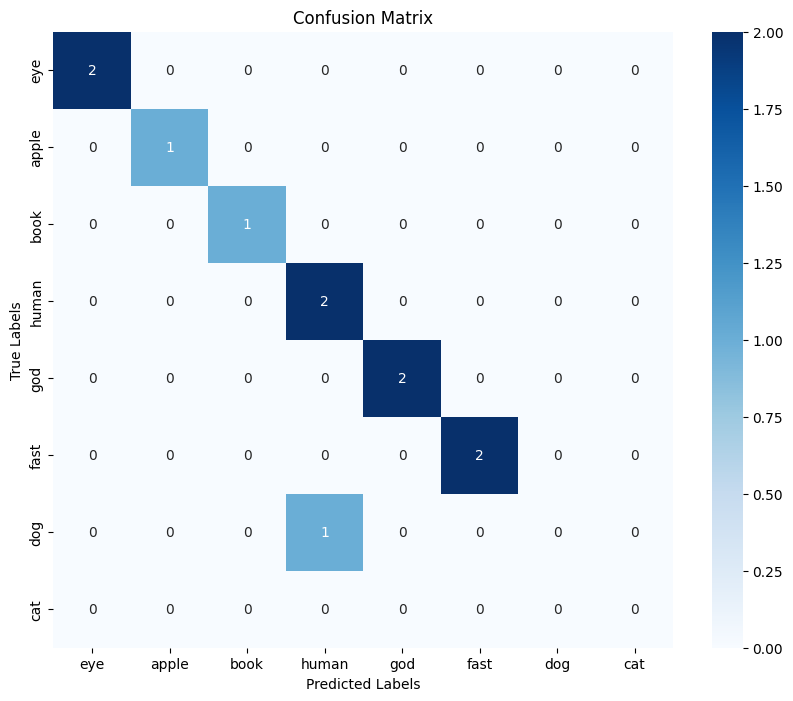

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels, labels=list(range(len(dictionary))))

# Plot the confusion  as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dictionary, yticklabels=dictionary)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Test Accuracy
accuracy = 100 * (1 - np.mean(missed))
print('Test accuracy:',accuracy,'%')

Test accuracy: 90.9090909090909 %


In [ ]:
!jupyter nbconvert --to html /content/foo.ipynb